## Metabolomics Workbench integration

Download and process workbench studies

In [2]:
import requests
import pandas as pd
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from networkx.algorithms import bipartite
import libchebipy

In [213]:
base_url = 'https://www.metabolomicsworkbench.org/rest/study/analysis_id/'

In [297]:

studies = ['ST000041', 'ST002829', 'ST001420', 'ST001789','ST001412', 'ST002016', 'ST001736', 'ST002301', 'ST001933', 'ST000899', 'ST000284', 'ST002428', 'ST000974', 'ST002100', 'ST001940', 'ST002498']
studies_assays = dict.fromkeys(studies)


In [300]:
studies_assays


{'ST000041': ['AN000062', 'AN000063'],
 'ST002829': ['AN004619', 'AN004620', 'AN004621', 'AN004622'],
 'ST001420': ['AN002375'],
 'ST001789': ['AN002901', 'AN002902'],
 'ST001412': ['AN002362'],
 'ST002016': ['AN003284', 'AN003285'],
 'ST001736': ['AN002826', 'AN002827'],
 'ST002301': ['AN003757'],
 'ST001933': ['AN003143'],
 'ST000899': ['AN001462', 'AN001463', 'AN001464', 'AN001465'],
 'ST000284': ['AN000452'],
 'ST002428': ['AN003951', 'AN003952'],
 'ST000974': ['AN001595'],
 'ST002100': ['AN003432', 'AN003433'],
 'ST001940': ['AN003155', 'AN003156', 'AN003157', 'AN003158'],
 'ST002498': ['AN004654', 'AN004655', 'AN004656', 'AN004657']}

In [299]:

# Get assays for each study
for s in studies:
    
    base_url = 'https://www.metabolomicsworkbench.org/rest/study/study_id/repl/analysis'
    resp = requests.get(base_url.replace('repl', s)).json()
    print(resp)
    if list(resp.keys())[0] != '1':
        resp_series = pd.Series(resp)
        print(resp_series['analysis_id'])
        studies_assays[s] = [resp_series['analysis_id']]
    else:
        resp_df = pd.DataFrame.from_dict(resp).T
        print(resp_df['analysis_id'].tolist())
        studies_assays[s] = resp_df['analysis_id'].tolist()



{'1': {'study_id': 'ST000041', 'analysis_id': 'AN000062', 'analysis_summary': 'MS negative ion mode', 'analysis_type': 'MS', 'chromatography system': 'Agilent 1200', 'column_name': 'Waters Acquity HSS T3', 'chromatography_type': 'Reversed phase', 'ms_instrument_name': 'Agilent 6530 QTOF', 'ms_instrument_type': 'QTOF', 'ms_type': 'ESI', 'ion_mode': 'NEGATIVE', 'nmr_instrument_type': '', 'nmr_experiment_type': '', 'spectrometer_frequency': '', 'nmr_solvent': '', 'units': 'Counts'}, '2': {'study_id': 'ST000041', 'analysis_id': 'AN000063', 'analysis_summary': 'MS positive ion mode', 'analysis_type': 'MS', 'chromatography system': 'Agilent 1200', 'column_name': 'Waters Acquity HSS T3', 'chromatography_type': 'Reversed phase', 'ms_instrument_name': 'Agilent 6530 QTOF', 'ms_instrument_type': 'QTOF', 'ms_type': 'ESI', 'ion_mode': 'POSITIVE', 'nmr_instrument_type': '', 'nmr_experiment_type': '', 'spectrometer_frequency': '', 'nmr_solvent': '', 'units': 'Counts'}}
['AN000062', 'AN000063']


{'1': {'study_id': 'ST002829', 'analysis_id': 'AN004619', 'analysis_summary': 'Reversed phase POSITIVE ION MODE', 'analysis_type': 'MS', 'chromatography system': 'Waters Acquity', 'column_name': 'Waters ACQUITY UPLC BEH C18 (100 x 2.1mm,1.7um)', 'chromatography_type': 'Reversed phase', 'ms_instrument_name': 'Thermo Q Exactive Orbitrap', 'ms_instrument_type': 'Orbitrap', 'ms_type': 'ESI', 'ion_mode': 'POSITIVE', 'nmr_instrument_type': '', 'nmr_experiment_type': '', 'spectrometer_frequency': '', 'nmr_solvent': '', 'units': 'log transformed data'}, '2': {'study_id': 'ST002829', 'analysis_id': 'AN004620', 'analysis_summary': 'Reversed phase POSITIVE ION MODE', 'analysis_type': 'MS', 'chromatography system': 'Waters Acquity', 'column_name': 'Waters ACQUITY UPLC BEH C18 (100 x 2.1mm,1.7um)', 'chromatography_type': 'Reversed phase', 'ms_instrument_name': 'Thermo Q Exactive Orbitrap', 'ms_instrument_type': 'Orbitrap', 'ms_type': 'ESI', 'ion_mode': 'POSITIVE', 'nmr_instrument_type': '', 'nmr_ex

In [301]:
# download all assays per study
for study in studies:
    print(study)
    base_url = 'https://www.metabolomicsworkbench.org/rest/study/analysis_id/'
    #check if directory exists
    if not os.path.isdir('Studies/'+study):
        os.mkdir('Studies/'+study)

        for assay in studies_assays[study]:
            url = base_url + assay + '/datatable/file'
            print(url)
            pd.read_csv(url, sep='\t').to_csv('Studies/'+study+'/'+f'{assay}.csv', index=False)
    else:
        pass



ST000041
https://www.metabolomicsworkbench.org/rest/study/analysis_id/AN000062/datatable/file
https://www.metabolomicsworkbench.org/rest/study/analysis_id/AN000063/datatable/file
ST002829
ST001420
ST001789
ST001412
ST002016
ST001736
ST002301
ST001933
ST000899
ST000284
ST002428
ST000974
ST002100
ST001940
ST002498


In [263]:
# manually edit metadata
an002826 = pd.read_csv('Studies/ST001736/AN002826.csv')
an002826['Class'] = an002826['Class'].str.split(' | ').str[0]
an002826.to_csv('Studies/ST001736/AN002826.csv', index=False)

an002827 = pd.read_csv('Studies/ST001736/AN002827.csv')
an002827['Class'] = an002827['Class'].str.split(' | ').str[0]
an002827.to_csv('Studies/ST001736/AN002827.csv', index=False)

In [281]:
# manually edit metadata
for filepath in glob.iglob('Studies/ST002829/*'):
    print(filepath)

    assay = pd.read_csv(filepath)
    assay['Class'] = assay['Class'].str.split(' | ').str[2]
    assay.to_csv(filepath, index=False)


Studies/ST002829\AN004619.csv
Studies/ST002829\AN004620.csv
Studies/ST002829\AN004621.csv
Studies/ST002829\AN004622.csv


In [302]:
for filepath in glob.iglob('Studies/ST000041/*'):
    print(filepath)

    assay = pd.read_csv(filepath)
    assay['Class'] = assay['Class'].str.split(' | ').str[0]
    assay.to_csv(filepath, index=False)

Studies/ST000041\AN000062.csv
Studies/ST000041\AN000063.csv


In [408]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from scipy import stats
from statsmodels.stats.multitest import multipletests
import networkx as nx
import glob
import sspa

refmet = pd.read_csv('refmet.csv', dtype=object)
name2class = dict(zip(refmet[' refmet_name'], refmet['super_class']))

class WorkbenchDataset:
    '''AN003284.csv
    Class to process Metabolomics Workbench datasets
    '''

    def __init__(self, study_id, md_filter, name, outliers=None, remove_suffix=None, pathway_level=False):
        self.study_id = study_id
        self.md_filter = md_filter
        self.raw_data = None
        self.outliers = outliers
        self.pathway_level = pathway_level
        self.pathway_coverage = None
        self.pathway_data = None
        self.DA_metabolites = None
        self.node_name = study_id
        self.remove_suffix = remove_suffix
        self.name = name
        self.compound_classes = None

        self.read_data()
        # self.get_pathway_data()
        self.da_testing()

    def read_data(self):
        # check if there are multiple files in folder
        files = glob.glob('Studies/'+self.study_id+'/*.csv')
        if len(files) > 1:
            # read in all files and concatenate
            dfs = []
            dfs_proc = []
            for f in files:
                df = pd.read_csv(f)
                dfs.append(df)
                df.index = df['Samples']
                self.raw_data = df

                df_proc = self.preprocess_data()
                dfs_proc.append(df_proc)

            self.raw_data = pd.concat(dfs, axis=1)
            self.processed_data = pd.concat(dfs_proc, axis=1)
            self.processed_data = self.processed_data.loc[:, ~self.processed_data.columns.duplicated()]
            # move group column to end
            cols = [col for col in self.processed_data.columns if col != 'Group'] + ['Group']
            self.processed_data = self.processed_data[cols]

        else:
            data = pd.read_csv(files[0])
            data.index = data['Samples']
            self.raw_data = data

            data_proc = self.preprocess_data()
            self.processed_data = data_proc


        metadata = self.raw_data['Class']
        self.metadata = metadata

        return self.processed_data, self.metadata
    
    def preprocess_data(self):
        '''Preprocess data'''
        data_filt = self.raw_data.copy()
        # drop duplicate columns

        # filter on metadata
        md_dict = dict(zip(self.raw_data['Samples'], self.raw_data['Class']))
        data_filt = data_filt[data_filt['Class'].isin(self.md_filter.values())]
        data_filt = data_filt.drop(columns=['Class', 'Samples'])

        # convert to refmet id
        mets_url = 'https://www.metabolomicsworkbench.org/rest/study/study_id/repl/metabolites'
        mets = requests.get(mets_url.replace('repl', self.study_id)).text
        mets_df = pd.read_json(mets).T
        mets_dict = dict(zip(mets_df['metabolite_name'], mets_df['refmet_name']))
        data_filt.columns = data_filt.columns.map(mets_dict)

        # drop na column names
        data_filt = data_filt.loc[:, data_filt.columns.notna()]

        try:
            data_filt = data_filt.drop(columns=[''])
        except KeyError:
            pass

        # drop outliers
        if self.outliers:
            data_filt = data_filt.drop(self.outliers)

        # Missingness checks 
        # replace empty strings with NaN
        data_filt = data_filt.replace(['', ' ', 0], np.nan)
        # Delete colums and rows where all values are missing
        data_filt = data_filt.dropna(axis=0, how='all')
        data_filt = data_filt.dropna(axis=1, how='all')

        # Delete rows and columns where all values are 0 
        data_filt = data_filt.loc[:, (data_filt != 0).any(axis=0)]
        data_filt = data_filt.loc[(data_filt != 0).any(axis=1), :]

        data_filt = data_filt.dropna(axis=1, thresh=0.5*data_filt.shape[0])
        missing_pct = data_filt.isnull().sum().sum() / (data_filt.shape[0] * data_filt.shape[1]) * 100
        print(f"Missingness: {missing_pct:.2f}%")

        # impute missing values
        imputer = KNNImputer(n_neighbors=2, weights="uniform").set_output(transform="pandas")
        data_imputed = imputer.fit_transform(data_filt)

        # delete cols where all values are the same
        data_imputed = data_imputed[[i for i in data_imputed if len(set(data_imputed[i]))>1]]

        # log transformation
        data_imputed = np.log(data_imputed + 1)

        # standardize
        scaler = StandardScaler().set_output(transform="pandas")
        data_scaled = scaler.fit_transform(data_imputed)

        data_scaled['Group'] = data_scaled.index.map(md_dict)

        # self.processed_data = data_scaled
        self.compound_classes = {k: name2class[k] if k in name2class.keys() else None for k in data_scaled.columns[:-1]}

        return data_scaled


    def get_pathway_data(self):
        reactome_paths = sspa.process_gmt(infile='../MetDMN/Reactome_Homo_sapiens_pathways_ChEBI_R88.gmt')
        reactome_dict = sspa.utils.pathwaydf_to_dict(reactome_paths)
        data = self.processed_data

        # convert to pubchem
        pubchem_conv = {k: name2pubchem[k] if k in name2pubchem.keys() else None for k in data.columns[:-1]}
        chebi_ids = {k: pubchem_to_chebi(v) for k, v in pubchem_conv.items()}
        print(chebi_ids)


        # store pathway coverage stats
        cvrg_dict = {k: len(set(data.columns).intersection(set(v))) for k, v in reactome_dict.items()}
        self.pathway_coverage = cvrg_dict

        scores = sspa.sspa_KPCA(reactome_paths).fit_transform(data.iloc[:, :-1])
        scores['Group'] = self.processed_data['Group']
        self.pathway_data = scores
 
    def plot_qc(self):
        # PCA biplot
        pca = PCA(n_components=2).set_output(transform="pandas")
        pca_result = pca.fit_transform(self.processed_data.iloc[:, :-1])
        self.pca = pca_result

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        sns.scatterplot(
            x=pca_result.iloc[:, 0], y=pca_result.iloc[:, 1],
            hue="Group",
            data=self.processed_data,
            alpha=0.7,
            ax=ax1
        )

        # normality every nth feature
        normaliser = 10 * self.processed_data.shape[1]
        data_long = self.processed_data.melt(id_vars='Group')
        sns.boxplot(data=data_long.iloc[0:normaliser, :], ax=ax2, hue='Group', x='variable', y='value')
        ax2.axhline(0, color='red', linestyle='--')
        plt.show()


    def da_testing(self):

        if self.pathway_level == True:
            dat = self.pathway_data
        else:
            dat = self.processed_data

        # t-test for two groups
        case = self.md_filter['Case']
        control = self.md_filter['Control']
        
        stat, pvals = stats.ttest_ind(dat[dat['Group'] == case].iloc[:, :-1],
                        dat[dat['Group'] == control].iloc[:, :-1],
                        alternative='two-sided', nan_policy='raise')
        pval_df = pd.DataFrame(pvals, index=dat.columns[:-1], columns=['P-value'])
        pval_df['Stat'] = stat
        pval_df['Direction'] = ['Up' if x > 0 else 'Down' for x in stat]
        self.pval_df = pval_df

        # fdr correction 
        pval_df['FDR_P-value'] = multipletests(pvals, method='fdr_bh')[1]

        # return significant metabolites
        self.DA_metabolites = pval_df[pval_df['FDR_P-value'] < 0.05].index.tolist()
        print(f"Number of differentially abundant metabolites: {len(self.DA_metabolites)}") 

        # generate tuples for nx links
        self.connection = [(self.node_name, met) for met in self.DA_metabolites]
        self.full_connection = [(self.node_name, met) for met in self.processed_data.columns[:-1]]



In [382]:
refmet[refmet[' refmet_name'] == 'Stachydrine']

,refmet_name,super_class,main_class,sub_class,formula,exactmass,inchi_key,smiles,pubchem_cid
121530,Stachydrine,Organic acids,Amino acids and peptides,Amino acids,C7H14NO2,144.102454,CMUNUTVVOOHQPW-ZCFIWIBFSA-O,C[N+]1(C)CCC[C@@H]1C(=O)O,7016563


In [439]:
refmet.head()

,refmet_name,super_class,main_class,sub_class,formula,exactmass,inchi_key,smiles,pubchem_cid
0,Acutumidine,Alkaloids,Alkaloids,Other alkaloids,C18H22ClNO6,383.113567,SBALNGLYQFMKPR-NQTWQHAWSA-N,COC1=CC(=O)[C@]2([C@H](C[C@@]34C(=C(C(=O)C[C@@...,442840
1,Adifoline,Alkaloids,Alkaloids,Other alkaloids,C22H20N2O7,424.127053,DJWXVEDJWPDUBQ-DEALGVFLSA-N,C[C@@H]1[C@@H]2[C@H](Cc3c4c(cc(C(=O)O)n3)c3cc(...,441972
2,Adlumine,Alkaloids,Alkaloids,Other alkaloids,C21H21NO6,383.136889,SZDGAZFTAUFFQH-OALUTQOASA-N,CN1CCc2cc(c(cc2[C@H]1[C@@H]1c2ccc3c(c2C(=O)O1)...,442155
3,Affinine,Alkaloids,Alkaloids,Other alkaloids,C20H24N2O2,324.183778,PXFBZOLANLWPMH-SMLHJDAJSA-N,C/C=C\1/CN(C)[C@@H]2Cc3c4ccccc4[nH]c3C(=O)C[C@...,5281345
4,Agroclavine,Alkaloids,Alkaloids,Other alkaloids,C16H18N2,238.146999,XJOOMMHNYOJWCZ-UKRRQHHQSA-N,CC1=C[C@@H]2c3cccc4c3c(C[C@H]2N(C)C1)c[nH]4,73484


In [442]:
import requests

def get_chebi_id_from_pubchem(pubchem_id):
    # Base URL for PubChem PUG-REST API
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{pubchem_id}/xrefs/JSON"
    
    # Make the request to PubChem
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code != 200:
        print(f"Error fetching data from PubChem. Status code: {response.status_code}")
        return None
    
    # Parse the JSON response
    data = response.json()
    
    # Extract ChEBI ID from the response
    for item in data.get('InformationList', {}).get('Information', []):
        if 'CHEBI' in item.get('ExternalID', {}):
            return item['ExternalID']['CHEBI']
    
    # If ChEBI ID is not found
    return None

# Example usage
pubchem_id = 2244  # PubChem ID for Acetaminophen
chebi_id = get_chebi_id_from_pubchem(pubchem_id)

if chebi_id:
    print(f"ChEBI ID for PubChem ID {pubchem_id} is {chebi_id}")
else:
    print(f"No ChEBI ID found for PubChem ID {pubchem_id}")


Error fetching data from PubChem. Status code: 400
No ChEBI ID found for PubChem ID 2244


## COVID

In [12]:
# manually edit 
an003284 = pd.read_csv('Studies\ST002016\AN003284.csv')

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\3726228951.py:2: SyntaxWarning: invalid escape sequence '\S'
  an003284 = pd.read_csv('Studies\ST002016\AN003284.csv')


In [358]:
an003284[an003284.Samples.str.contains('NEG')]

,Samples,Class,10-Hydroxycarbazepine,11-Aminoundecanoic acid,11-Nitro-1-undecene,1-(1Z-hexadecenyl)-sn-glycero-3-phosphocholine,12-Aminododecanoic acid,12-Hydroxydihydrochelirubine,1_3_5-Heptatriene,1_3-Dicyclohexylurea,...,Venlafaxine,Veronal,Vestitol,Xanthine,Xanthohumol,Zalcitabine,Zearalenone,(Z)-Thiamethoxam,α-Aspartylphenylalanine,γ-Linolenic acid ethyl ester
0,Blank_01_NEG,group:-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Blank_02_NEG,group:-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Pooled_QC_ID_01_NEG,group:-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Pooled_QC_ID_02_NEG,group:-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Pooled_QC_ID_03_NEG,group:-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,QC5_NEG,group:QC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314,QC6_NEG,group:QC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,QC7_NEG,group:QC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,QC8_NEG,group:QC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
an003284 = an003284[~an003284.Samples.str.contains('NEG')]

In [14]:
an003284.Samples = an003284.Samples.str[:-4]

In [15]:
an003284.to_csv('Studies\ST002016\AN003284.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\4122490758.py:1: SyntaxWarning: invalid escape sequence '\S'
  an003284.to_csv('Studies\ST002016\AN003284.csv', index=False)


In [16]:
# manually edit 
an003285 = pd.read_csv('Studies\ST002016\AN003285.csv')
an003285 = an003285[~an003285.Samples.str.contains('POS')]
an003285.Samples = an003285.Samples.str[:-4]
an003285.to_csv('Studies\ST002016\AN003285.csv', index=False)

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\731885699.py:2: SyntaxWarning: invalid escape sequence '\S'
  an003285 = pd.read_csv('Studies\ST002016\AN003285.csv')
C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\731885699.py:5: SyntaxWarning: invalid escape sequence '\S'
  an003285.to_csv('Studies\ST002016\AN003285.csv', index=False)


In [366]:
an003285

,Samples,Class,1_3-Dithiane,1_4-Diguanidinobutane,2-Amino-6-hydroxyaminopurine,2-Hydroxyethanesulfonate,2-Hydroxyfluorene,2-Methacryloyloxyethyl phenyl phosphate,2-Methyl-3-thioacetoxy-4_5-dihydrofuran,3_7_3^_4^-Tetramethylquercetin,...,SAT,Ser-Ser,Succinic acid,tebuthiuron,Thiamin,Thiolactomycin,Tilnoprofen arbamel,Uridine,Xanthohumol,Xanthone
0,Blank_01,group:-,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Blank_02,group:-,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Pooled_QC_ID_01,group:-,2545352.88,27909.57,482153.24,95642.79,1483686.89,14731.59,275516.90,130585.66,...,44849.42,89477.35,1594118.11,51278.57,23812.57,38639958.92,260952.49,24178.74,20706.02,7819181.57
6,Pooled_QC_ID_02,group:-,2932817.63,92563.51,4460957.19,1172393.37,4926822.08,190954.67,339213.77,878557.40,...,32836.91,266517.73,3512381.01,215842.56,97594.08,30778786.03,116891.94,1778308.90,17965.17,24139095.72
8,Pooled_QC_ID_03,group:-,2839143.29,40147.65,343882.38,94361.16,1109763.58,14299.45,102014.31,223284.96,...,34217.00,90655.16,755404.29,35590.51,14331.82,38917359.47,81404.81,46862.08,20266.51,5038131.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,QC5,group:QC,2276721.13,72476.55,494298.04,441702.77,7209910.12,123123.38,514113.37,555534.37,...,46170.51,55273.08,1634128.78,115648.51,58496.03,29364651.46,58649504.91,206982.53,616725.21,45262634.54
314,QC6,group:QC,2427198.45,81567.02,774140.59,376912.48,6970610.82,134689.57,493463.23,565835.78,...,45780.40,46574.23,1684784.00,121791.08,45038.35,28186793.60,50643356.08,308094.29,690418.19,43417926.60
316,QC7,group:QC,2687213.28,82027.95,513879.45,402755.04,7235206.90,114140.61,497036.29,517013.50,...,63060.19,59897.10,1603783.33,106680.09,55727.65,29040320.00,60136647.39,263147.92,581929.06,43927990.11
318,QC8,group:QC,2552931.68,74738.52,650662.99,383287.86,7212936.11,119507.39,532545.91,534356.77,...,52946.84,58168.06,1572778.21,107951.23,26482.60,27977912.91,46862401.36,293534.44,607915.12,41515273.53


In [383]:
ST002016 = WorkbenchDataset(
    study_id='ST002016',
    md_filter={'Control': 'group:Healthy', 'Case': 'group:COVID_non-acute'},
    name = 'COVID'
)

C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 0.00%
Missingness: 0.00%
Number of differentially abundant metabolites: 134


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


In [18]:
ST002016.raw_data

,Samples,Class,10-Hydroxycarbazepine,11-Aminoundecanoic acid,11-Nitro-1-undecene,1-(1Z-hexadecenyl)-sn-glycero-3-phosphocholine,12-Aminododecanoic acid,12-Hydroxydihydrochelirubine,1_3_5-Heptatriene,1_3-Dicyclohexylurea,...,SAT,Ser-Ser,Succinic acid,tebuthiuron,Thiamin,Thiolactomycin,Tilnoprofen arbamel,Uridine,Xanthohumol,Xanthone
Samples,,,,,,,,,,,,,,,,,,,,,
Blank_01,Blank_01,group:-,53738.86,41643.32,1072200.02,257028.77,649817.85,46375.86,414975.98,186092.77,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Blank_02,Blank_02,group:-,53738.86,41643.32,1072200.02,257028.77,649817.85,46375.86,414975.98,186092.77,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Pooled_QC_ID_01,Pooled_QC_ID_01,group:-,59768.77,228688.41,1308727.75,1765870.03,534256.69,58827.72,329840.94,130139.98,...,44849.42,89477.35,1594118.11,51278.57,23812.57,38639958.92,260952.49,24178.74,20706.02,7819181.57
Pooled_QC_ID_02,Pooled_QC_ID_02,group:-,60649.51,281739.50,1427281.99,1404388.44,568084.32,82153.15,65517.30,86377.29,...,32836.91,266517.73,3512381.01,215842.56,97594.08,30778786.03,116891.94,1778308.90,17965.17,24139095.72
Pooled_QC_ID_03,Pooled_QC_ID_03,group:-,90701.58,430703.08,1298199.23,508017.23,700646.78,58422.59,314060.31,101287.07,...,34217.00,90655.16,755404.29,35590.51,14331.82,38917359.47,81404.81,46862.08,20266.51,5038131.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QC5,QC5,group:QC,206066.49,660218.86,1266585.45,2824260.65,1096651.02,231625.85,912168.79,400190.01,...,46170.51,55273.08,1634128.78,115648.51,58496.03,29364651.46,58649504.91,206982.53,616725.21,45262634.54
QC6,QC6,group:QC,187329.42,756105.70,1571092.90,2743524.85,1116189.28,228844.94,968636.26,314552.76,...,45780.40,46574.23,1684784.00,121791.08,45038.35,28186793.60,50643356.08,308094.29,690418.19,43417926.60
QC7,QC7,group:QC,200138.91,695737.21,1850553.12,2540378.42,1110362.14,287890.80,948417.60,309186.12,...,63060.19,59897.10,1603783.33,106680.09,55727.65,29040320.00,60136647.39,263147.92,581929.06,43927990.11


In [19]:
ST002016.processed_data

,Licarbazepine,11-Aminoundecanoic acid,LPC P-16:0 or LPC O-16:1,12-Aminododecanoic acid,1-Aminocyclopropanecarboxylic acid,LPC 20:4/0:0,LPC 17:0/0:0,LPC 18:2,1-Methyladenosine,1-Methylhistidine,...,Nicotinic acid mononucleotide,Nicotinamide riboside,O-Phosphohomoserine,Oseltamivir,Pyruvic acid,Ser-Ser,Succinic acid,Thiamine,Thiolactomycin,Group
Samples,,,,,,,,,,,,,,,,,,,,,
Pat_01,-0.391501,-0.499201,-0.340687,0.424524,0.358929,-0.429352,0.064769,0.052089,0.242936,-0.268910,...,-0.063350,-0.333274,-0.381193,0.911409,0.552132,0.157604,-0.387642,-0.373263,0.335224,group:COVID_non-acute
Pat_03,-0.589999,-0.098957,0.552865,2.297518,0.808207,-0.046935,0.325828,0.614246,0.048755,1.074518,...,0.274593,0.898421,0.109031,1.774808,-0.091447,2.280532,-0.127080,-0.224235,-1.225924,group:COVID_non-acute
Pat_04,-0.450537,-0.294829,-1.147143,-0.553897,-0.049494,-1.051168,-0.793316,-1.129438,0.607322,0.477567,...,0.600886,-0.103756,0.290885,0.715489,0.369230,0.827110,0.214847,0.050049,-0.043814,group:COVID_non-acute
Pat_101,-0.396634,2.261386,1.910740,1.143326,-1.066528,2.394340,1.032317,1.271327,0.538869,2.075704,...,1.216311,0.359597,-0.343425,0.337301,0.064913,-0.114988,-0.080430,-0.213205,-0.590465,group:COVID_non-acute
Pat_106,-0.192098,-0.130297,0.721273,0.259501,0.974639,0.044590,0.044940,0.487463,0.395329,0.536402,...,0.571531,0.753991,-0.664223,-1.208174,0.054383,0.718596,-0.498196,-0.654318,0.991943,group:COVID_non-acute
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pat_63,-0.456025,-0.945660,-2.149682,-0.382994,-0.130450,-1.893707,-2.416953,-1.173470,-0.491561,-1.664129,...,0.944524,0.576943,-0.531422,1.431172,1.432128,-0.769141,-0.197840,2.979275,0.836592,group:Healthy
Pat_64,-0.552309,-0.593394,-2.403159,0.057591,0.932325,-2.006690,-2.497728,-1.847855,-0.378045,0.125389,...,0.807958,-0.873588,-0.421746,-1.855704,0.510099,0.654287,-0.078007,-1.112891,0.142004,group:Healthy
Pat_65,-0.421216,-1.121857,-1.035559,-0.679266,0.492512,-0.764465,-0.788258,-1.007440,-1.221662,-0.731572,...,-0.558157,-1.073891,-0.586065,0.376763,-0.477020,-1.138108,-0.834997,-0.500037,0.445825,group:Healthy


In [23]:
ST002016.processed_data['Group']

Samples
Pat_01     group:COVID_non-acute
Pat_03     group:COVID_non-acute
Pat_04     group:COVID_non-acute
Pat_101    group:COVID_non-acute
Pat_106    group:COVID_non-acute
                   ...          
Pat_63             group:Healthy
Pat_64             group:Healthy
Pat_65             group:Healthy
Pat_66             group:Healthy
Pat_67             group:Healthy
Name: Group, Length: 96, dtype: object

In [21]:
ST002016.processed_data['Group'].value_counts()

Group
group:COVID_non-acute    48
group:Healthy            48
Name: count, dtype: int64

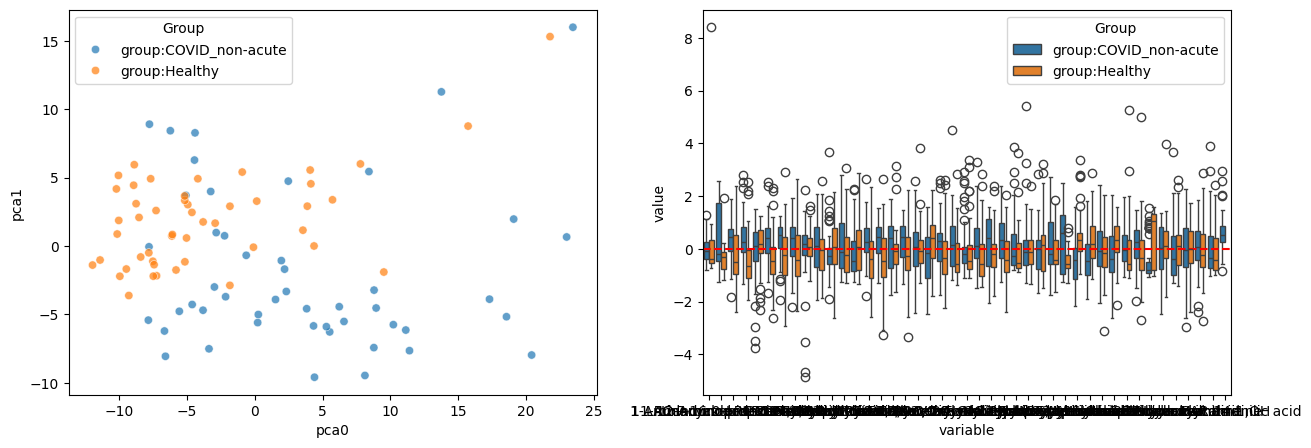

In [24]:
ST002016.plot_qc()

In [384]:
ST002301 = WorkbenchDataset(
    study_id='ST002301',
    name='COVID',
    # filepath='AN003757.csv',
    md_filter={'Control': 'Severity of Disease:Asymptomatic', 'Case': 'Severity of Disease:Severe'})

Missingness: 3.78%
Number of differentially abundant metabolites: 31


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


In [386]:
ST002301.processed_data.shape

(150, 93)

In [26]:
ST002301.processed_data

,1-Methyladenosine,2-Pyrrolidinone,3-Indolepropionic acid,3-Methylindole,3-Methylxanthine,4-Aminophenol,5-Hydroxyindoleacetic acid,5-Hydroxy-tryptophan,9-Methyluric acid,Acetaminophen,...,Sphingosine,Succinic acid,Succinylacetone,Thyroxine,Trimethylamine,Urea,N-Carbamoylaspartic acid,Uric acid,Uridine,Group
Samples,,,,,,,,,,,,,,,,,,,,,
Plasma35-01_41_1_2344,-0.410495,2.967939,1.149424,-0.054903,-0.102755,1.109235,0.446829,-1.943437,-0.060562,1.182997,...,1.930979,-1.522422,0.112247,-0.408366,-0.068881,-2.511496,0.577640,0.064137,-2.518393,Severity of Disease:Asymptomatic
Plasma35-02_41_1_2345,-0.602777,2.428257,1.094336,-0.021960,0.004071,1.138148,0.238900,-1.730955,0.014656,1.192927,...,2.218925,-0.898658,0.168954,0.093750,-0.097766,-3.650480,-0.414285,0.689469,-2.176128,Severity of Disease:Asymptomatic
Plasma36-01_42_1_2346,-1.620672,3.105157,1.479806,0.621857,0.991852,-1.009483,-0.757488,0.181689,0.734329,-0.923478,...,0.462863,0.936072,0.414117,0.395983,0.776820,-0.492577,-1.050423,0.269238,-1.840380,Severity of Disease:Asymptomatic
Plasma36-02_42_1_2347,0.273588,3.272333,1.316169,0.682260,0.958401,-0.900611,-0.735027,0.468630,0.632600,-0.898551,...,0.648044,1.121428,-0.156841,0.141966,0.798582,-1.986787,-0.157311,1.231639,-1.499797,Severity of Disease:Asymptomatic
Plasma37-01_43_1_2348,-0.847621,2.925202,1.421728,0.353679,-1.039472,-0.682503,0.199688,-0.951375,-1.221760,-0.474039,...,1.897320,-0.425232,0.348289,1.119572,0.946812,-0.513141,0.677903,-0.262631,-1.028572,Severity of Disease:Asymptomatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Plasma83-02_89_1_2455,-0.198777,-1.495349,-0.771112,-0.296626,-0.790472,1.401227,-1.362326,-1.488316,-1.281079,1.341681,...,-1.358153,-0.229043,-0.856302,-2.015858,0.328087,-0.407237,0.164324,-0.496282,0.903209,Severity of Disease:Severe
Plasma84-01_90_1_2456,0.649940,-1.204574,-0.044785,0.522582,-1.022806,0.467562,-0.306385,0.754779,-0.304556,0.500308,...,1.655211,0.299898,-1.573495,0.955822,-3.032179,-1.042404,-1.001813,1.587613,-0.273047,Severity of Disease:Severe
Plasma84-02_90_1_2457,0.331474,-1.608606,0.406036,0.378144,-1.263359,0.570576,-0.191732,0.594735,-0.367831,0.530114,...,1.216726,0.389654,-1.084485,1.025237,-2.905269,-0.900655,-0.725027,1.852979,-1.150450,Severity of Disease:Severe


In [27]:
ST002301.processed_data['Group'].value_counts()

Group
Severity of Disease:Severe          90
Severity of Disease:Asymptomatic    60
Name: count, dtype: int64

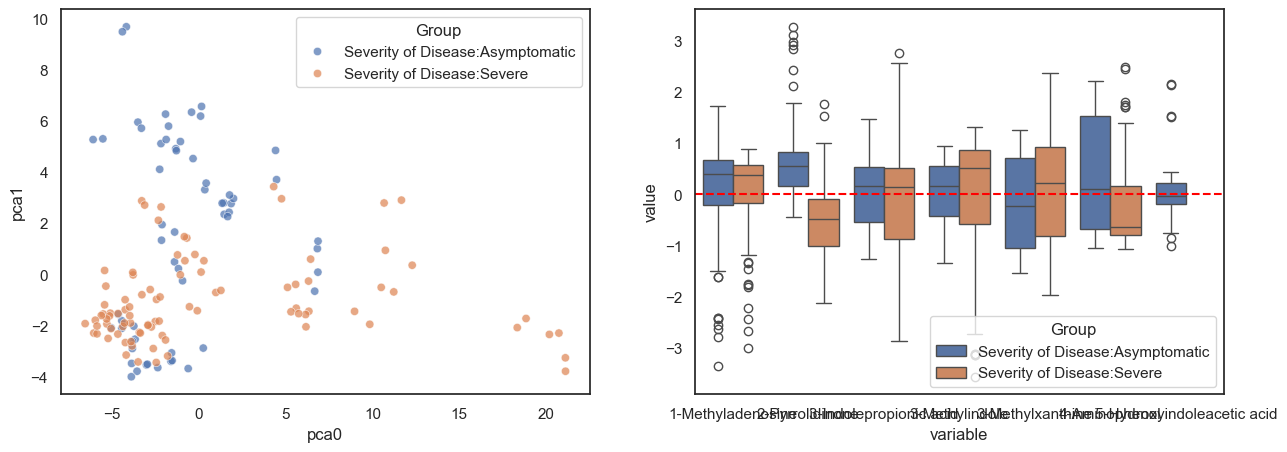

In [187]:
ST002301.plot_qc()

In [385]:
ST001736 = WorkbenchDataset(
    study_id='ST001736',
    name='COVID',
    # filepath='AN002826_updated.csv',
    md_filter={'Control': 'COVID_Status:Negative', 'Case': 'COVID_Status:Positive'})

C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 0.82%


Missingness: 2.72%
Number of differentially abundant metabolites: 3


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


In [265]:
ST001736.processed_data

,3-Methyleneoxindole,4-Acetamidobutanoic acid,5-Hydroxyindoleacetic acid,5-Hydroxyisouric acid,gamma-Glutamylglutamine,Acetylcholine,Alanine,Allantoic acid,2-Aminobenzoic acid,Arginine,...,Pantothenic acid,Phosphoric acid,Phosphoenolpyruvic acid,Pyruvic acid,Succinic acid,Taurine,Thymine,trans-4-Hydroxyproline,UDP,Group
Samples,,,,,,,,,,,,,,,,,,,,,
CUcovID_0037,-1.195304,-0.177598,-0.053416,-1.696239,-0.731249,-0.288194,-1.137307,-0.882160,-0.851381,-1.633192,...,-0.914061,-1.036013,0.473731,0.016713,-1.562528,-0.770139,-0.781035,-1.171038,-2.845470,COVID_Status:Negative
CUcovID_0094,-1.327105,-0.398977,1.491737,-0.716047,-0.691719,-0.676216,-0.655300,-0.698948,-1.346262,-1.230952,...,-0.024075,0.782532,-0.005685,-0.837434,-0.478999,0.533387,0.093889,-1.277670,0.902387,COVID_Status:Negative
CUcovID_0028,0.246600,-0.534104,0.736302,-0.890392,-0.042740,-0.004660,-0.764800,-0.093959,-0.475525,-0.402315,...,-1.170433,-0.847806,0.307835,-0.765879,0.232548,0.465658,0.305814,-1.364326,1.046791,COVID_Status:Negative
CUcovID_0079,1.491527,0.736494,0.440572,-0.408585,0.416002,-1.553097,0.841889,0.694390,0.584698,-0.693634,...,-0.442622,0.958692,-0.893455,-0.631933,-0.677015,-0.506346,0.507554,1.124038,0.743820,COVID_Status:Negative
CUcovID_0017,0.115540,-0.324194,0.505983,0.773731,1.145826,0.777705,0.753774,0.544722,-0.391833,-0.147286,...,0.223919,0.146637,0.617405,0.859793,1.079973,1.191524,0.661345,-1.318413,-0.178552,COVID_Status:Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUcovID_0056,0.064781,-0.873240,-0.238705,-0.511856,0.634791,-0.546363,0.672286,-0.892906,-0.270527,-0.064371,...,0.741864,-0.563130,-0.009594,-1.025227,-0.481557,0.526786,-5.224171,-0.937401,0.590905,COVID_Status:Positive
CUcovID_0057,1.225233,0.003025,-0.030598,1.498187,0.987376,0.906437,1.084836,1.095020,-0.222503,1.004077,...,-0.116955,0.438327,0.343674,0.332677,0.117583,0.189745,1.061575,0.381878,0.765335,COVID_Status:Positive
CUcovID_0062,1.727100,-0.322875,-1.033367,-0.283434,-4.437509,0.495705,1.207251,1.854973,0.473122,-1.613708,...,-0.994901,1.477855,-1.280268,1.428359,1.407557,-0.544873,0.072207,0.353599,0.519476,COVID_Status:Positive


In [266]:
ST001736.processed_data['Group'].value_counts()

Group
COVID_Status:Positive    71
COVID_Status:Negative    31
Name: count, dtype: int64

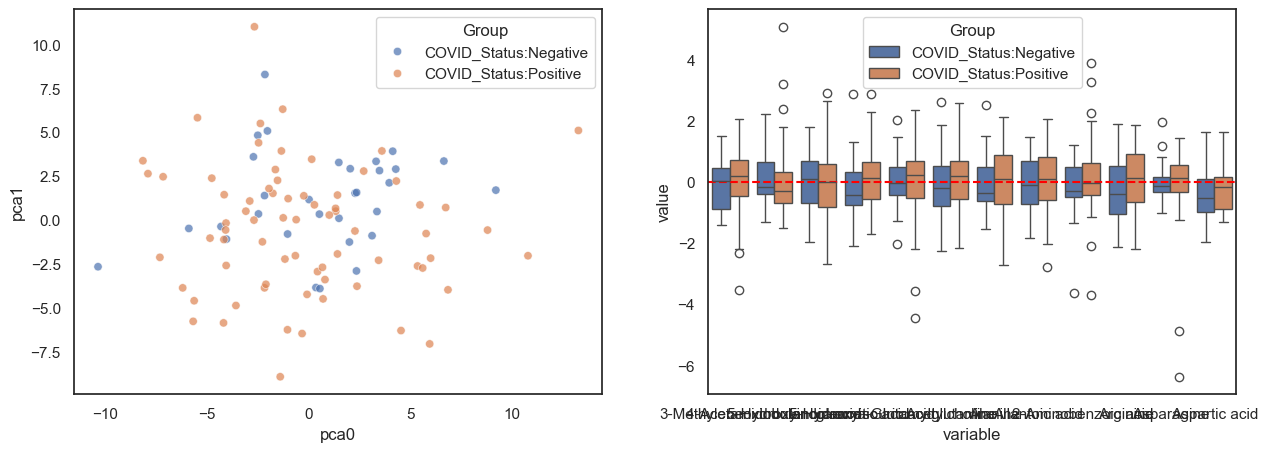

In [267]:
ST001736.plot_qc()

In [386]:
ST001933 = WorkbenchDataset(
    study_id='ST001933',
    name='COVID',
    md_filter={'Control': 'Group:H', 'Case': 'Group:CA'})

Missingness: 2.90%
Number of differentially abundant metabolites: 1


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


In [184]:
ST001933.processed_data['Group'].value_counts()

Group
Group:H     35
Group:CA    17
Name: count, dtype: int64

In [327]:
ST001933.processed_data.shape

(52, 180)

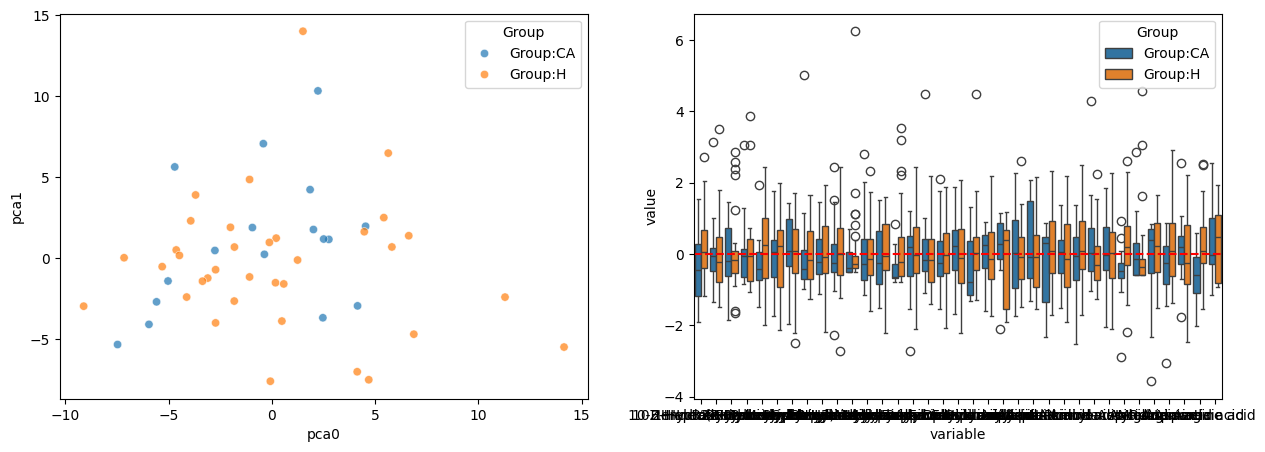

In [33]:
ST001933.plot_qc()

## IBD

In [387]:
ST000899 = WorkbenchDataset(
    study_id='ST000899',
    name='IBD',
    md_filter={'Control': 'Type:Control', 'Case': 'Type:Ulcerative Colitis'})

C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 7.14%


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 1.46%


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 5.01%
Missingness: 2.80%
Number of differentially abundant metabolites: 0


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


In [35]:
ST000899.processed_data['Group'].value_counts()

Group
Type:Control               20
Type:Ulcerative Colitis    20
Name: count, dtype: int64

In [36]:
ST000899.processed_data.shape   

(40, 519)

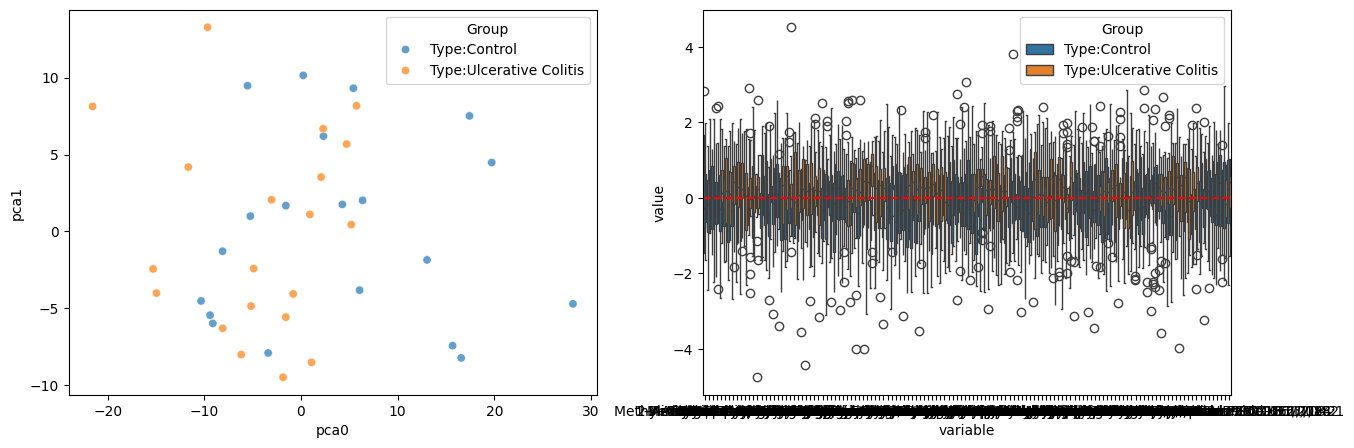

In [37]:
ST000899.plot_qc()

## Cancer

In [388]:
ST000284 = WorkbenchDataset(
    study_id='ST000284',
    name='Colorectal cancer',
    md_filter={'Control': 'Patient group:Healthy', 'Case': 'Patient group:CRC'})

Missingness: 0.00%
Number of differentially abundant metabolites: 7


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


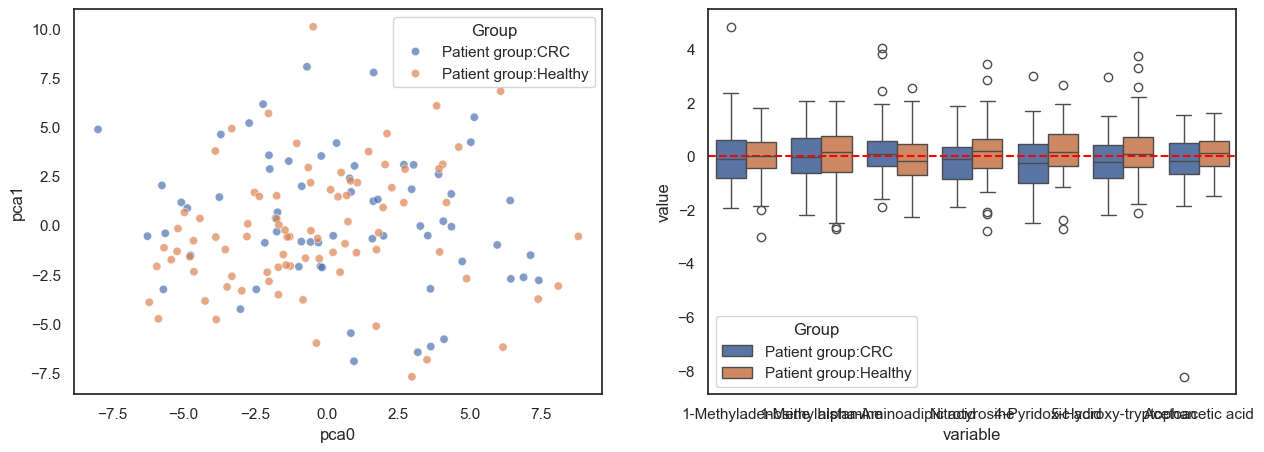

In [181]:
ST000284.plot_qc()

In [389]:
ST000284.processed_data.shape

(148, 102)

In [40]:
ST000284.processed_data['Group'].value_counts()

Group
Patient group:Healthy    84
Patient group:CRC        64
Name: count, dtype: int64

## TB

In [412]:
ST002428 = WorkbenchDataset(
    study_id='ST002428',
    # filepath='AN002826_updated.csv',
    name='Tuberculosis',
    md_filter={'Control': 'Label:Controls', 'Case': 'Label:TB'})

C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\3302181712.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 5.27%


Missingness: 4.91%
Number of differentially abundant metabolites: 19


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\3302181712.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T
c:\Users\cw2019\.conda\envs\py12\Lib\site-packages\scipy\stats\_axis_nan_policy.py:563: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


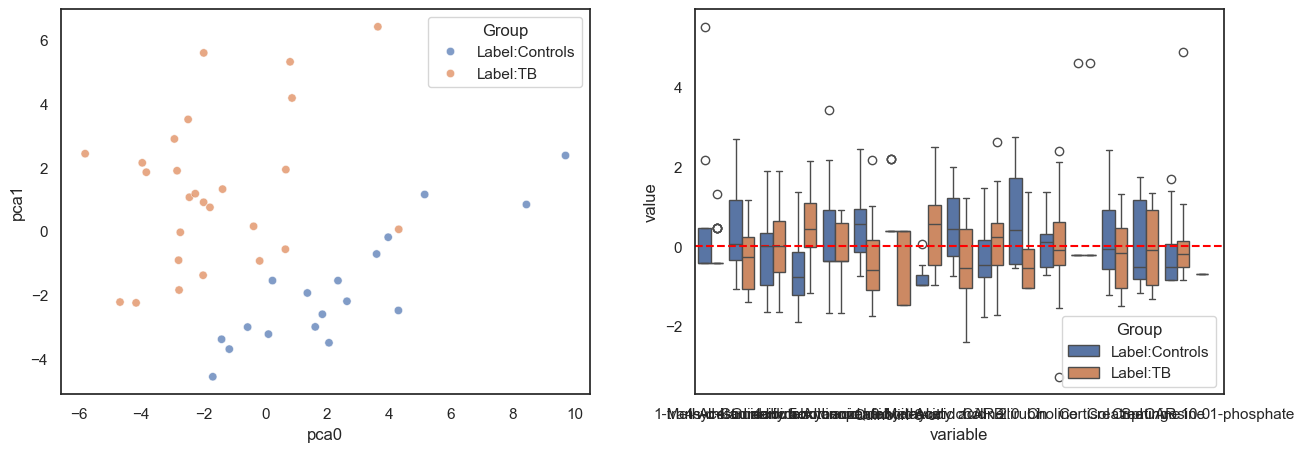

In [436]:
ST002428.plot_qc()

In [179]:
ST002428.pval_df.sort_values(by='P-value')

,P-value,Stat,Direction,FDR_P-value
Tryptophan,1.100015e-07,-6.387464,Down,0.000007
9-Methyluric acid,1.866685e-06,5.531845,Up,0.000063
Methionine,1.189332e-05,-4.965842,Down,0.000214
Hexanoylglycine,1.255960e-05,4.949025,Up,0.000214
4-Guanidinobutanoic acid,2.743966e-05,4.706573,Up,0.000373
...,...,...,...,...
N-Acetylserotonin,8.386264e-01,0.204918,Up,0.891041
Hippuric acid,8.881728e-01,0.141473,Up,0.929165
Pipecolic acid,9.197836e-01,-0.101314,Down,0.941874
Glutamine,9.280233e-01,-0.090876,Down,0.941874


In [445]:
#split md
st000974 = pd.read_csv('Studies\ST000974\AN001595.csv')


<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\cw2019\AppData\Local\Temp\ipykernel_66232\1668443190.py:2: SyntaxWarning: invalid escape sequence '\S'
  st000974 = pd.read_csv('Studies\ST000974\AN001595.csv')


In [453]:
st000974['Class'] = st000974['Class'].str.split(' | ').str[0]

In [454]:
st000974.to_csv('Studies\ST000974\AN001595.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\cw2019\AppData\Local\Temp\ipykernel_66232\3511435816.py:1: SyntaxWarning: invalid escape sequence '\S'
  st000974.to_csv('Studies\ST000974\AN001595.csv', index=False)


In [433]:
ST000974 = WorkbenchDataset(
    study_id='ST000974',
    name='TB',
    # filepath='AN002826_updated.csv',
    md_filter={'Control': 'GROUP:control', 'Case': 'GROUP:case'})

C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\3302181712.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 0.26%
Number of differentially abundant metabolites: 1


c:\Users\cw2019\.conda\envs\py12\Lib\site-packages\scipy\stats\_axis_nan_policy.py:563: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


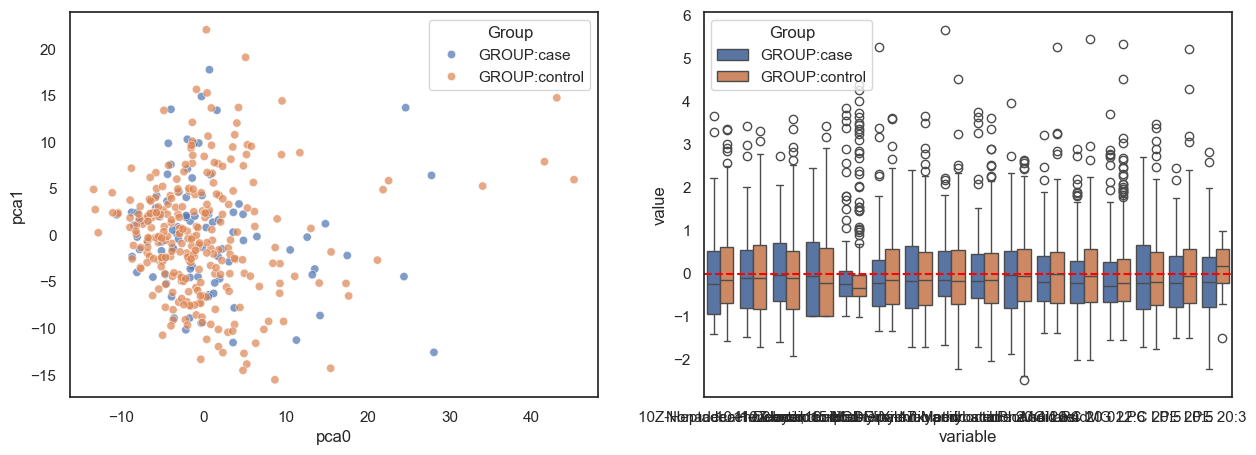

In [434]:
ST000974.plot_qc()


In [43]:
ST000974.processed_data.shape

(366, 603)

In [44]:
ST000974.raw_data


,Samples,Class,10-heptadecenoate (17:1n7),10-nonadecenoate (19:1n9),10-undecenoate (11:1n1),1-(14 or 15-methyl)palmitoyl-GPC (a17:0 or i17:0)*,11-dehydrocorticosterone,12_13-DiHOME,1_2-propanediol,1_3_7-trimethylurate,...,valyltryptophan,valylvaline,vanillylmandelate (VMA),xanthine,xanthosine,xanthurenate,XHWESASXXR*,xylitol,xylonate,xylose
Samples,,,,,,,,,,,,,,,,,,,,,
MPIIB.2102,MPIIB.2102,GROUP:case,1.66,1.31,0.36,0.54,0.26,1.70,1.59,0.89,...,1.91,1.24,1.57,8.57,1.50,2.49,0.02,1.65,1.43,1.12
MPIIB.2425,MPIIB.2425,GROUP:case,8.87,6.47,2.63,1.06,0.11,0.14,0.91,0.04,...,0.11,0.08,0.88,2.09,0.10,1.04,7.62,0.30,0.68,1.06
MPIIB.3511,MPIIB.3511,GROUP:case,2.88,2.44,4.12,1.30,0.11,0.65,0.59,0.27,...,0.11,0.08,0.74,0.77,1.08,0.12,0.53,1.35,1.11,0.37
MPIIB.4622,MPIIB.4622,GROUP:case,1.19,1.43,0.98,0.78,1.02,1.51,0.79,0.04,...,0.11,0.08,0.64,1.13,0.10,0.12,0.65,0.44,1.10,1.04
MPIIB.8032,MPIIB.8032,GROUP:case,0.96,1.27,0.50,0.23,0.11,0.13,1.00,0.04,...,0.11,0.08,1.48,4.38,2.36,0.12,0.16,1.35,1.09,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MPIIB.6758,MPIIB.6758,GROUP:control,0.62,0.42,0.36,1.00,0.11,4.64,1.23,2.03,...,0.11,0.08,1.01,1.01,1.02,0.12,0.19,0.30,0.82,1.69
MPIIB.7041,MPIIB.7041,GROUP:control,3.18,1.76,1.23,0.79,0.92,2.05,1.19,0.84,...,0.11,0.08,1.06,1.56,1.27,1.16,0.02,1.65,1.16,0.37
MPIIB.7998,MPIIB.7998,GROUP:control,1.99,1.41,1.29,0.44,0.19,0.96,0.54,0.18,...,0.11,0.08,0.80,7.12,1.05,0.12,1.00,0.30,0.20,0.37


## Hepatitis

In [410]:

ST002100 = WorkbenchDataset(
    study_id='ST002100',
    name='Hepatitis',
    # filepath='AN002826_updated.csv',
    md_filter={'Control': 'Treatment:Healthy', 'Case': 'Treatment:Acute hepatitis'})

C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\3302181712.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 0.00%


Missingness: 0.00%
Number of differentially abundant metabolites: 46


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\3302181712.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


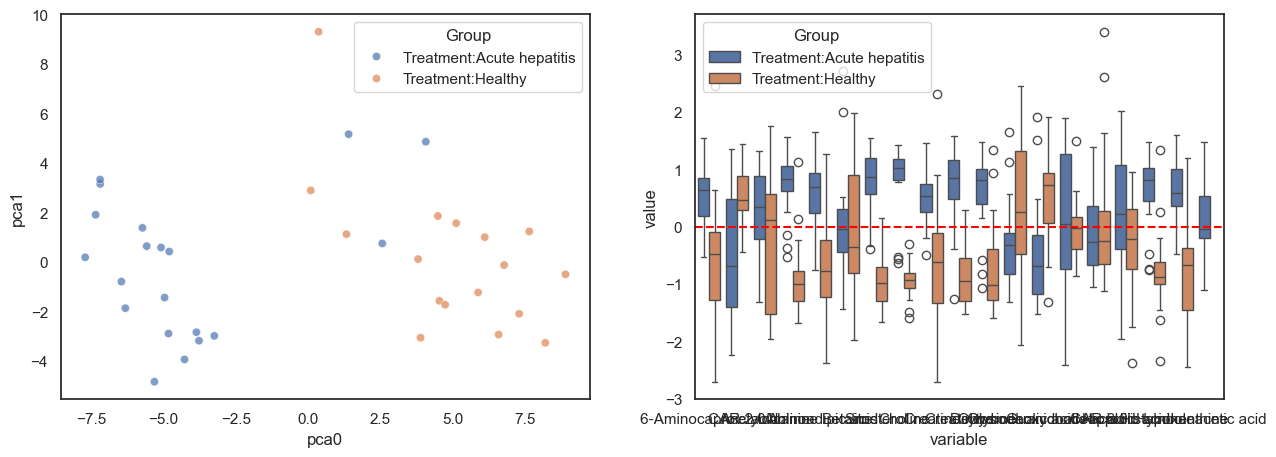

In [177]:
ST002100.plot_qc()

In [47]:
ST002100.processed_data.shape

(37, 68)

In [48]:
ST002100.processed_data['Group'].value_counts()

Group
Treatment:Acute hepatitis    20
Treatment:Healthy            17
Name: count, dtype: int64

## IBD/CBT before after

In [392]:

ST002498 = WorkbenchDataset(
    study_id='ST002498',
    name='Prostate cancer',
    # filepath='AN002826_updated.csv',
    md_filter={'Control': 'Diagnosis:0', 'Case': 'Diagnosis:1'})

C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 3.46%


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 4.58%


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 7.70%


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 5.82%
Number of differentially abundant metabolites: 1


In [153]:
ST002498.processed_data.Group.value_counts()

Group
Diagnosis:0    313
Diagnosis:1    267
Name: count, dtype: int64

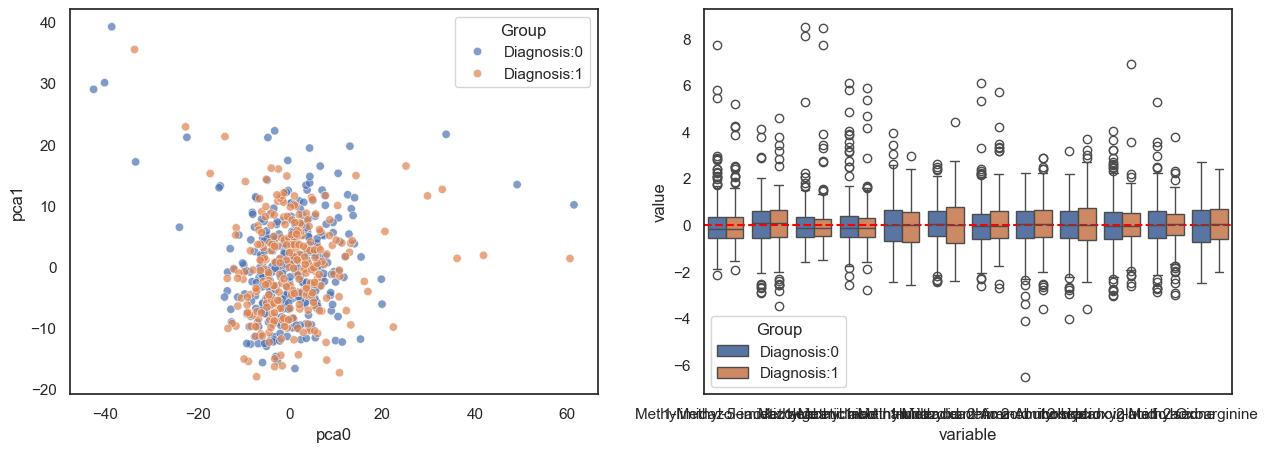

In [154]:
ST002498.plot_qc()

In [295]:
ST002498.pval_df.sort_values(by='P-value')

,P-value,Stat,Direction,FDR_P-value
Succinic acid,0.000002,4.761786,Up,0.001669
Ribitol,0.000554,3.472620,Up,0.190279
Palmitoleic acid,0.005071,2.813248,Up,0.987072
Histidine,0.008854,2.626568,Up,0.987072
Glucuronic acid,0.012037,2.519029,Up,0.987072
...,...,...,...,...
Pro-hydroxyPro,0.991792,-0.010292,Down,0.997221
Glycodeoxycholic acid 3-sulfate,0.992867,-0.008944,Down,0.997221
Glycochenodeoxycholic acid 3-glucuronide,0.994665,-0.006689,Down,0.997569
Phosphoethanolamine,0.997975,0.002539,Up,0.998504


## Obesity

In [409]:

ST001412 = WorkbenchDataset(
    study_id='ST001412',
    name='Obesity',
    # filepath='AN002826_updated.csv',
    md_filter={'Control': 'Group:Lean', 'Case': 'Group:Obese neuropathy'})

C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\3302181712.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 0.00%
Number of differentially abundant metabolites: 195


c:\Users\cw2019\.conda\envs\py12\Lib\site-packages\scipy\stats\_axis_nan_policy.py:563: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)


In [407]:
ST001412.pval_df

,P-value,Stat,Direction,FDR_P-value
10Z-Heptadecenoic acid,0.003951,-2.962961,Down,NaN
Nonadeca-10Z-enoic acid,0.055213,-1.943927,Down,NaN
10-Hendecenoic acid,0.672515,0.424168,Up,NaN
Isopentadecylic acid,0.920715,0.099830,Up,NaN
HODE,0.192823,1.312683,Up,NaN
...,...,...,...,...
Xanthine,0.001032,-3.398964,Down,NaN
Xanthurenic acid,0.309268,-1.022878,Down,NaN
CAR 26:1,0.587026,-0.545226,Down,NaN
Xylose,0.005166,-2.870857,Down,NaN


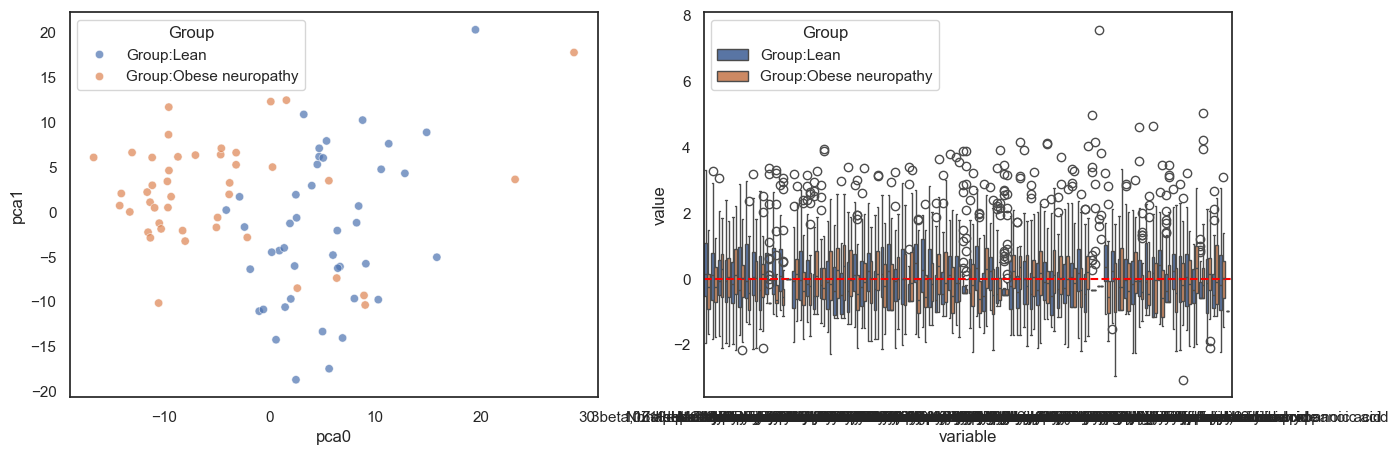

In [406]:
ST001412.plot_qc()

In [174]:
ST001412.processed_data.shape

(87, 648)

In [173]:
ST001412.processed_data.Group.value_counts()

Group
Group:Obese neuropathy    44
Group:Lean                43
Name: count, dtype: int64

## Pre/post exercise

In [394]:
ST001789 = WorkbenchDataset(
    study_id='ST001789',
    name='Pre/post exercise',
    # filepath='AN002826_updated.csv',
    md_filter={'Control': 'Group:Pre', 'Case': 'Group:Time 60'})

C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 0.00%
Missingness: 0.00%
Number of differentially abundant metabolites: 211


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


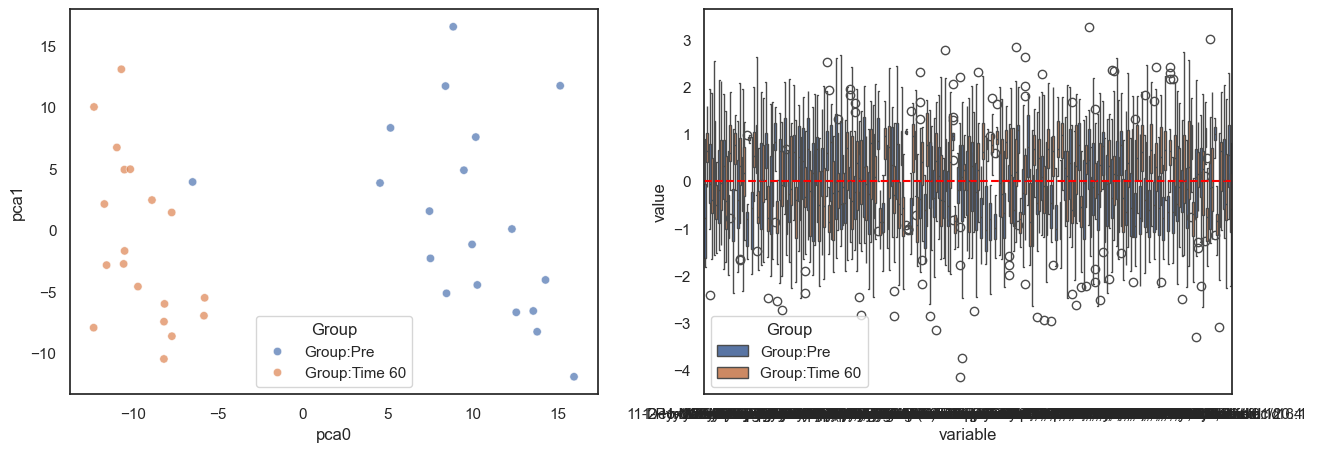

In [210]:
ST001789.plot_qc()

In [211]:
ST001789.processed_data.shape

(38, 429)

In [212]:
ST001789.processed_data.Group.value_counts()

Group
Group:Pre        19
Group:Time 60    19
Name: count, dtype: int64

## Angina

In [395]:
ST001420 = WorkbenchDataset(
    study_id='ST001420',
    name='Angina',
    outliers=['S17', 'S556'],
    # filepath='AN002826_updated.csv',
    md_filter={'Control': 'Disease:Angina', 'Case': 'Disease:Angina-free'})

Missingness: 0.00%
Number of differentially abundant metabolites: 291


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1866399869.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


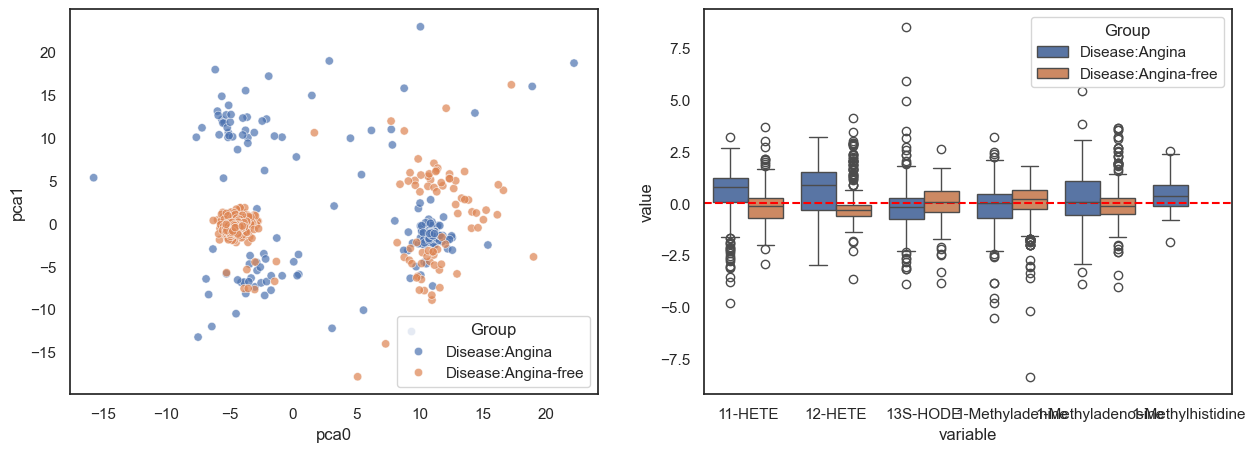

In [239]:
ST001420.plot_qc()

In [237]:
ST001420.pca.sort_values(by='pca0')

,pca0,pca1
Samples,,
S25,-16.259080,-1.401817
S36,-8.039917,-8.851602
S42,-7.627143,-13.442030
S45,-7.327230,6.801840
S41,-7.326363,-6.732284
...,...,...
S290,19.972859,3.205401
S60,20.737712,19.962112
S70,23.475146,18.004099


In [233]:
ST001420.processed_data.shape

(750, 383)

In [235]:
ST001420.processed_data.Group.value_counts()

Group
Disease:Angina-free    540
Disease:Angina         210
Name: count, dtype: int64

## COVID severity

In [294]:
ST002829 = WorkbenchDataset(
    study_id='ST002829',
    name='COVID',
    # outliers=['S17', 'S556'],
    # filepath='AN002826_updated.csv',
    md_filter={'Control': 'Severity_Scale:0', 'Case':'Severity_Scale:3'})

C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1559453270.py:88: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 0.00%


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1559453270.py:88: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 0.00%


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1559453270.py:88: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 0.00%


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1559453270.py:88: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 0.00%


ValueError: The input contains nan values

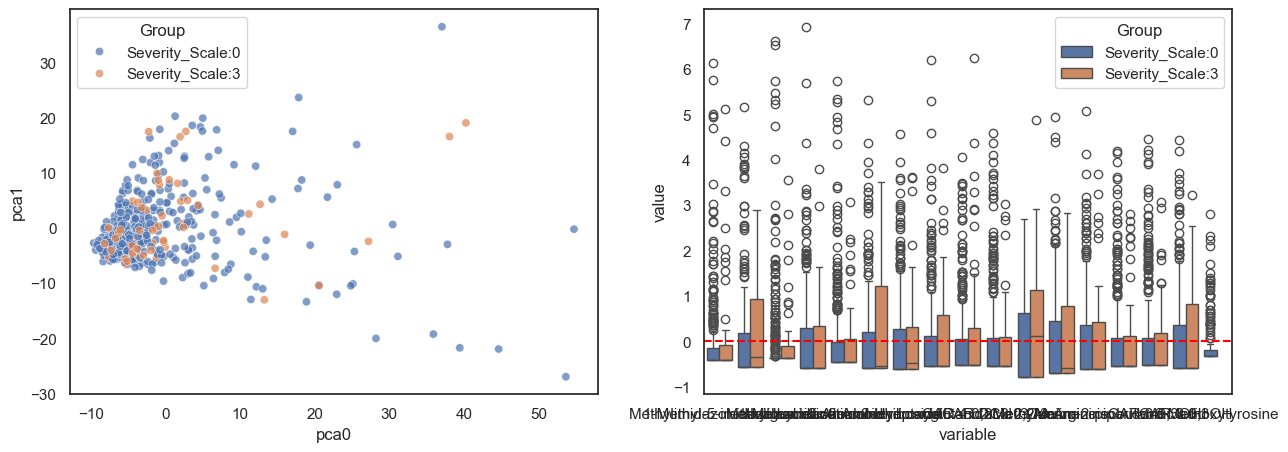

In [288]:
ST002829.plot_qc()

In [293]:
ST002829.processed_data.Group.value_counts()

Group
Severity_Scale:0    340
Severity_Scale:3     56
Name: count, dtype: int64

## High PUFA diet NAFLD

In [411]:
ST002829 = WorkbenchDataset(
    study_id='ST000041',
    name='NAFLD',
    # outliers=['S17', 'S556'],
    # filepath='AN002826_updated.csv',
    md_filter={'Control': 'Group:Control', 'Case':'Group:NAFLD'})

C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\3302181712.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 12.82%


C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\3302181712.py:92: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  mets_df = pd.read_json(mets).T


Missingness: 17.82%


ValueError: The input contains nan values

# Network

In [413]:
studies = [ST001420, ST002016, ST002301, ST001933, ST000899, ST000284, ST002100, ST000974, ST002428, ST002498, ST001412, ST001789]

In [414]:
def get_bipartite(studies):
    B = nx.Graph()
    # Add nodes with the node attribute "bipartite"-

    B.add_nodes_from([i.node_name for i in studies], bipartite=0)
    B.add_nodes_from(sum([i.DA_metabolites for i in studies], []), bipartite=1)
    # Add edges only between nodes of opposite node sets
    B.add_edges_from(sum([i.connection for i in studies], []))
    bottom_nodes, top_nodes = bipartite.sets(B)
    nx.is_connected(B)
    return B, bottom_nodes, top_nodes


In [435]:
studies_filt = []
for i in studies:
    print(i.node_name, len(i.DA_metabolites))
    if len(i.DA_metabolites) > 5:
        studies_filt.append(i)

ST001420 291
ST002016 134
ST002301 31
ST001933 1
ST000899 0
ST000284 7
ST002100 46
ST000974 1
ST002428 19
ST002498 1
ST001412 195
ST001789 211


In [416]:


covid_bpt, covid_bottom_nodes, covid_top_nodes = get_bipartite(studies_filt)


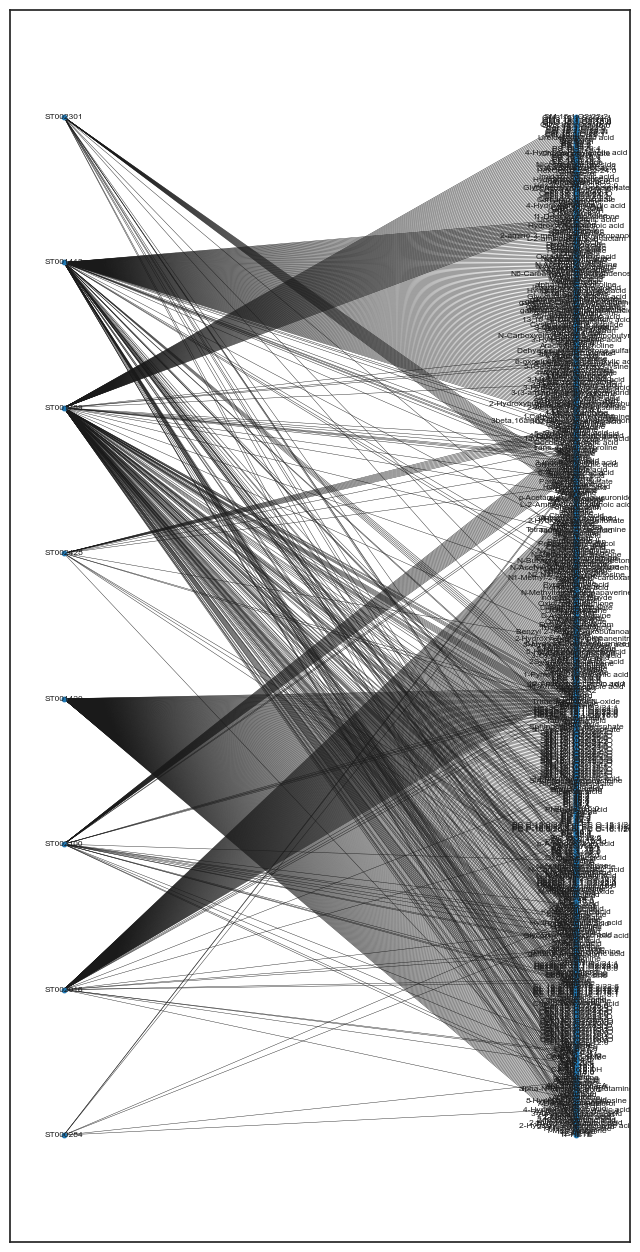

In [244]:
plt.figure(3,figsize=(8,16)) 
nx.draw_networkx(
    covid_bpt,
    pos = nx.drawing.layout.bipartite_layout(covid_bpt, covid_bottom_nodes),
    font_size=6,
    width = 0.3,
    with_labels=True,
    node_size=10,
    ) # Or whatever other display options you like

plt.show()


In [91]:
print(labels)

{'ST002016': 'ST002016', 'ST002301': 'ST002301', 'ST000284': 'ST000284', 'ST002100': 'ST002100'}


In [417]:
study_labels = dict(zip([i.node_name for i in studies_filt], [i.name for i in studies_filt]))

ST001420
ST002016
ST002301
ST000284
ST002100
ST002428
ST001412
ST001789


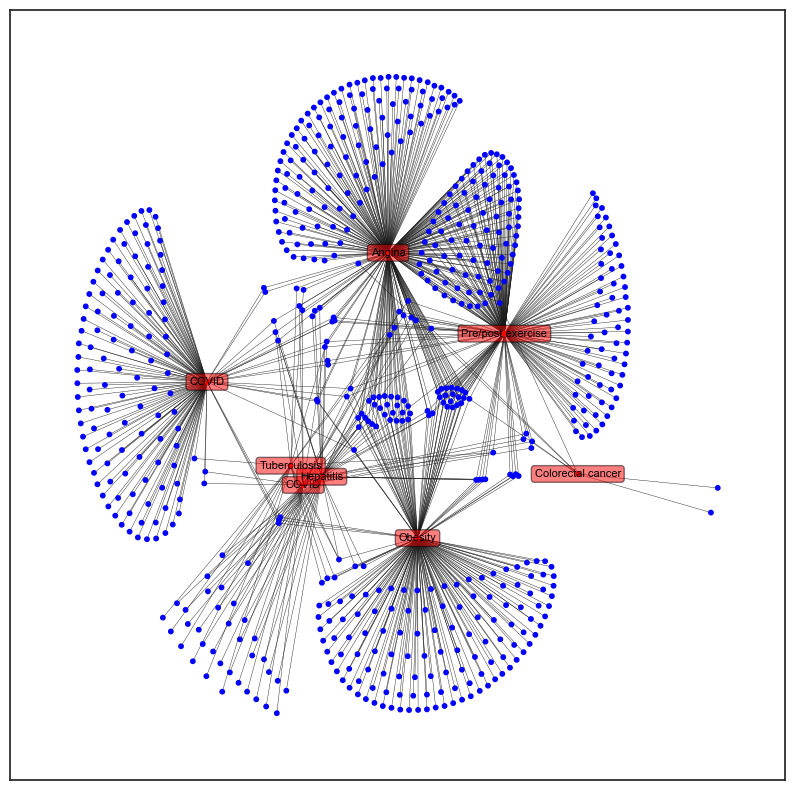

In [418]:

# force directed layout
pos = nx.drawing.layout.kamada_kawai_layout(covid_bpt)
color_map = []
labels = {}
for node in covid_bpt:
    if node in covid_bottom_nodes:
        print(node)
        color_map.append('red')
        labels[node] = study_labels[node]
    else: 
        color_map.append('blue')    
        # labels[node] = ''  


plt.figure(3,figsize=(10 ,10)) 
nx.draw_networkx(
    covid_bpt,
    pos = pos,
    font_size=6,
    width = 0.3,
    with_labels=False,
    node_size=10,
    node_color=color_map
    ) # Or whatever other display options you like
nx.draw_networkx_labels(covid_bpt, pos, labels,
                        bbox = dict(facecolor = "red", alpha=0.5, edgecolor='black', boxstyle='round,pad=0.3'),
                        font_size=8,
                        font_color='black')

plt.show()

In [336]:
# remove nodes linking to only one major node (disease)
# they wil all have degree = 1
remove = [node for node,degree in dict(covid_bpt.degree()).items() if degree == 1]
bpt_filt = covid_bpt
bpt_filt.remove_nodes_from(remove)


In [356]:
degree_dict = bpt_filt.degree()
degree_dict = dict(degree_dict)
degree_dict = {k: v for k, v in degree_dict.items() if k not in covid_bottom_nodes}
degrees = list(degree_dict.values())
degree_freqs = {i:degrees.count(i) for i in set(degrees)}

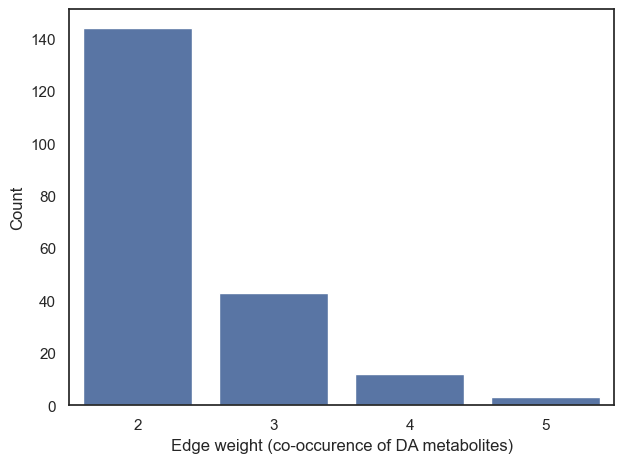

In [358]:
sns.barplot(
    degree_freqs
)
plt.xlabel('Edge weight (co-occurence of DA metabolites)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [363]:
node_degree = dict(zip(range(1, 6), sns.color_palette("Blues", 5)))

In [364]:
node_degree

{1: (0.8406920415224913, 0.9016378316032295, 0.9586620530565167),
 2: (0.6718954248366014, 0.8143790849673203, 0.9006535947712418),
 3: (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 4: (0.21568627450980393, 0.5294117647058824, 0.7542483660130719),
 5: (0.06251441753171857, 0.35750865051903113, 0.6429065743944637)}

ST001420
ST002016
ST002301
ST000284
ST002100
ST002428
ST001412
ST001789


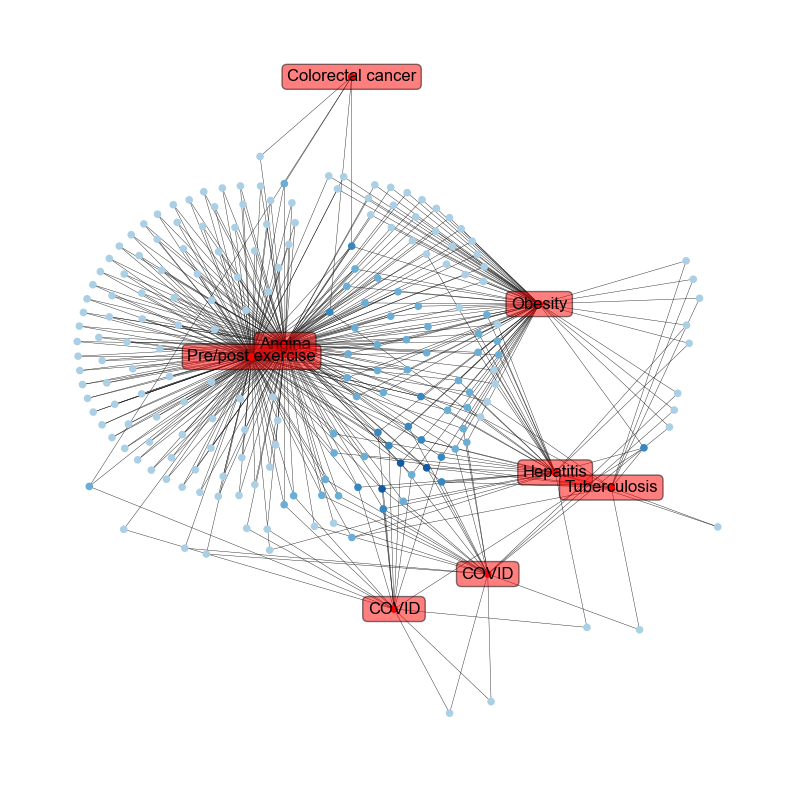

In [366]:
pos = nx.drawing.layout.kamada_kawai_layout(covid_bpt)
color_map = []
labels = {}
for node in covid_bpt:
    if node in covid_bottom_nodes:
        print(node)
        color_map.append('red')
        labels[node] = study_labels[node]
    else: 
        color_map.append(node_degree[degree_dict[node]])    
        # labels[node] = ''  
        
plt.figure(3,figsize=(10 ,10)) 
nx.draw_networkx(
    bpt_filt,
    pos = pos,
    font_size=6,
    width = 0.3,
    with_labels=False,
    node_size=20,
    node_color=color_map

    ) # Or whatever other display options you like
nx.draw_networkx_labels(bpt_filt, pos, labels,
                        bbox = dict(facecolor = "red", alpha=0.5, edgecolor='black', boxstyle='round,pad=0.3'),
                        font_size=12,
                        font_color='black')
plt.box(False)
plt.show()

In [419]:
biadj_mat = nx.bipartite.biadjacency_matrix(covid_bpt, row_order=covid_bottom_nodes, column_order=covid_top_nodes).toarray()

# create adjacency matrix based on the number of shared metabolites
# this can be done by multiplying the biadjacency matrix by its transpose
adj_mat = pd.DataFrame(biadj_mat @ biadj_mat.T, index=list(covid_bottom_nodes), columns=list(covid_bottom_nodes))


In [420]:
adj_mat.index = adj_mat.index.map(study_labels)
adj_mat.columns = adj_mat.index

c:\Users\cw2019\.conda\envs\py12\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


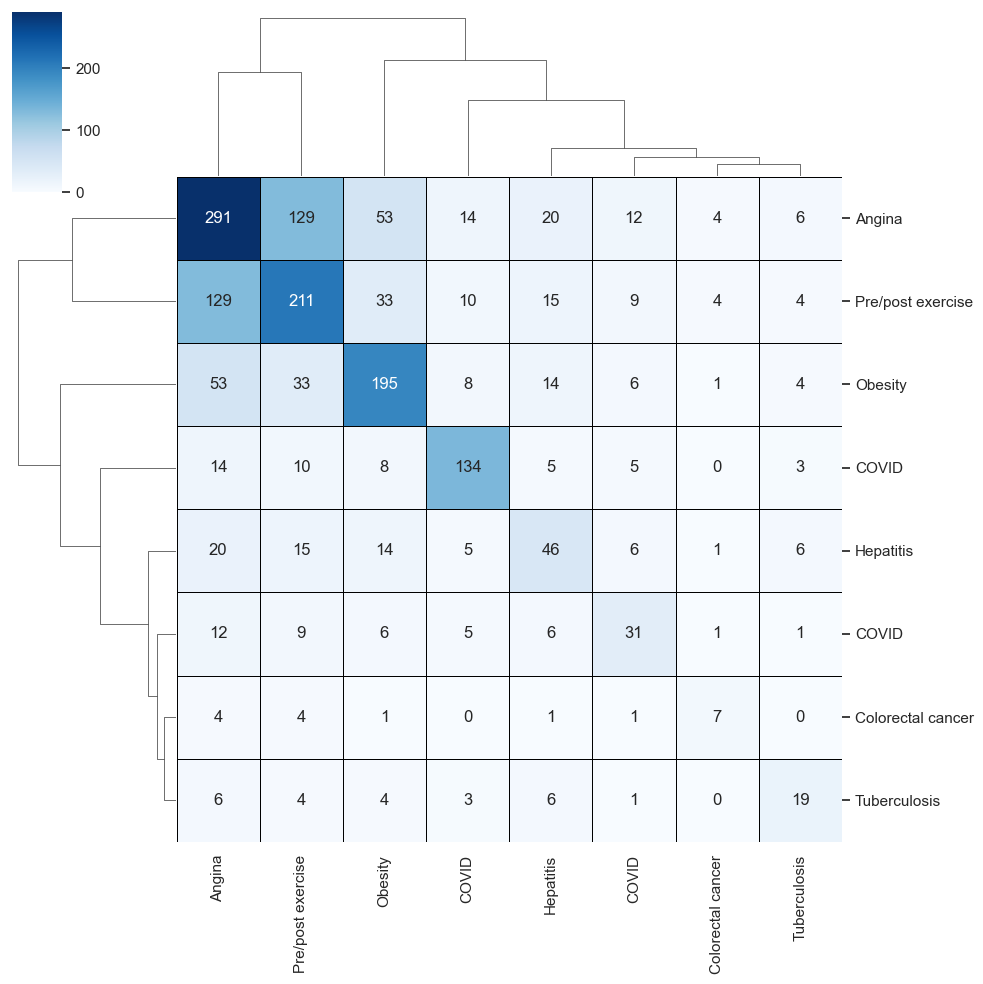

In [421]:

# fig, ax = plt.subplots(figsize=(7, 5))
sns.set(style='white')
sns.clustermap(
    adj_mat, 
    cmap='Blues', 
    square=True, 
    annot=True, 
    # cbar=False, 
    fmt='d', 
    linewidths=0.5, 
    linecolor='black' )
# ax.set_yticklabels(bottom_nodes, rotation=0)
# ax.set_xticklabels(bottom_nodes, rotation=90)
# ax.set_title('Similarity matrix of differential metabolites')
# plt.tight_layout()
plt.show()


In [423]:

# create adjacency matrix based on the number of shared metabolites
# this can be done by multiplying the biadjacency matrix by its transpose
adj_mat_dmn = pd.DataFrame(biadj_mat.T @ biadj_mat, index=list(covid_top_nodes), columns=list(covid_top_nodes))


# make pandas edgelist
edgelist_dmn = adj_mat_dmn.stack().reset_index()
edgelist_dmn.columns = ['source', 'target', 'weight']
edgelist_dmn = edgelist_dmn[edgelist_dmn['weight'] > 1]


In [258]:
edgelist_dmn.sort_values('weight', ascending=False)

,source,target,weight
367302,Cytosine,Cytosine,5
363324,Pantothenic acid,Pantothenic acid,5
134589,Tryptophan,Tryptophan,5
104091,CAR 2:0,CAR 2:0,4
69713,Threonine,Tryptophan,4
...,...,...,...
134660,Tryptophan,Pyruvic acid,2
134654,Tryptophan,Trimethylamine N-oxide,2
134652,Tryptophan,Homoserine,2
134651,Tryptophan,Cer 18:1;O2/22:2;O,2


In [424]:
# remove self links
edgelist_dmn = edgelist_dmn[edgelist_dmn['source'] != edgelist_dmn['target']]

In [425]:
edgelist_dmn.sort_values('weight', ascending=False)
dmn_graph = nx.from_pandas_edgelist(edgelist_dmn, edge_attr='weight')
dmn_graph.remove_edges_from(nx.selfloop_edges(dmn_graph))
nx.set_node_attributes(dmn_graph, dict(dmn_graph.degree()), 'degree')

print(dmn_graph.number_of_nodes())
print(dmn_graph.number_of_edges())


201
10077


In [426]:
biadj_mat_df = pd.DataFrame(biadj_mat, index=list(covid_bottom_nodes), columns=list(covid_top_nodes))
study_contributions = biadj_mat_df.divide(biadj_mat_df.sum(axis=0), axis=1)
# add contribution from each study 
nx.set_node_attributes(dmn_graph, study_contributions.to_dict())

# normalise by the number of studies



In [436]:
# add chemical classes
chem_dicts = [i.compound_classes for i in studies_filt]
chem_classes = {k: v for d in chem_dicts for k, v in d.items()}
nx.set_node_attributes(dmn_graph, chem_classes, 'superclass')
# check if any node attributes are none
none_nodes = [k for k, v in nx.get_node_attributes(dmn_graph, 'superclass').items() if v is None]

# replace none with unknown
for node in none_nodes:
    dmn_graph.nodes[node]['superclass'] = 'Unknown'


In [262]:
len(studies)

12

In [438]:
# export network
nx.write_graphml(dmn_graph, 'workbench_network_DA.graphml')

### Overlap between studies

In [113]:
studies = [ST002016, ST002301, ST001933, ST000899, ST000284, ST002100]

In [77]:
# look at overlap of metabolites between studies

overlap = pd.DataFrame(
    np.zeros((len(studies), len(studies))), 
    index=[i.node_name for i in studies], 
    columns=[i.node_name for i in studies]
)

for i in range(len(studies)):
    for j in range(len(studies)):
        overlap.iloc[i, j] = len(set(studies[i].processed_data.iloc[:, :-1].columns) & set(studies[j].processed_data.iloc[:, :-1].columns))


c:\Users\cw2019\.conda\envs\py12\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


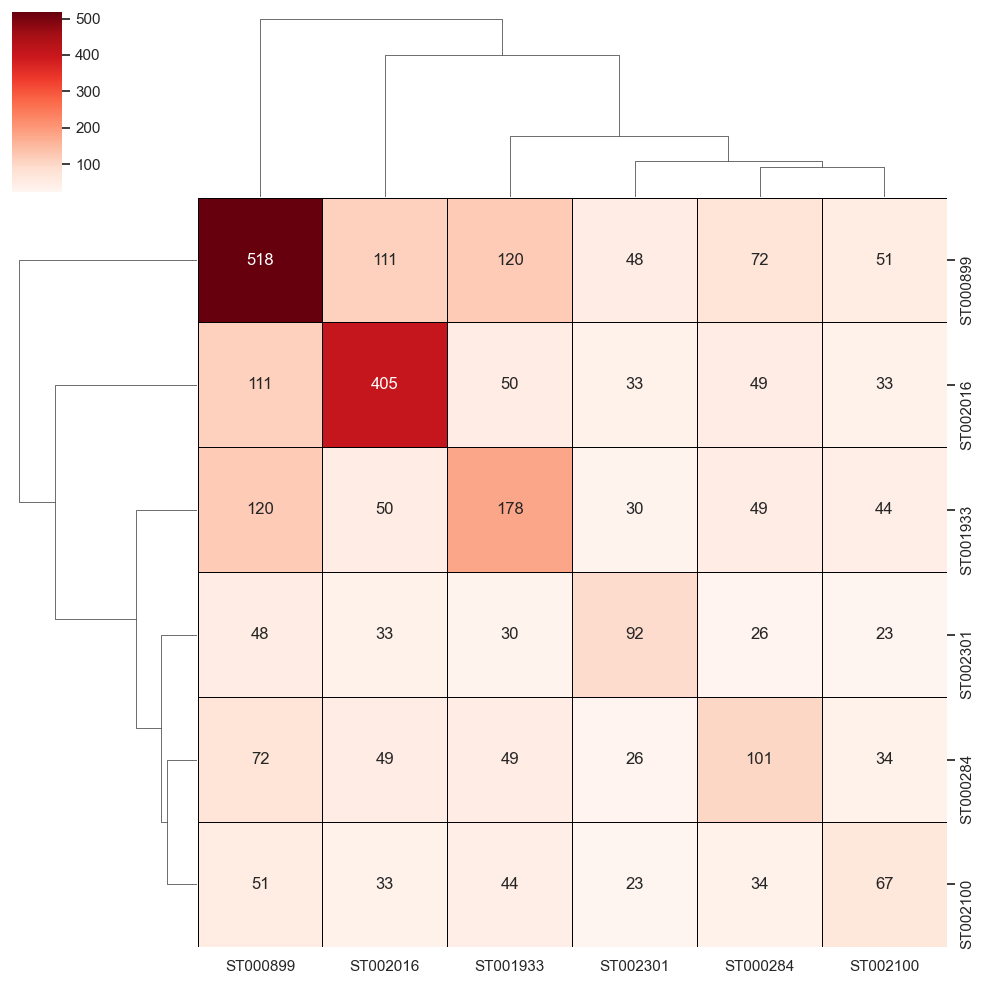

In [78]:

sns.set(style='white')
sns.clustermap(overlap, cmap='Reds', annot=True, square=True, fmt='2g', linewidths=0.5, linecolor='black')
plt.show()

# API searching
- search studies by the number of named metabolites (there might be a lot of lipids anyway
)

In [118]:
url = 'https://www.metabolomicsworkbench.org/rest/study/study_id/ST/named_metabolites/'

In [123]:
resp = requests.get(url).json()

In [125]:
studies_summary = pd.DataFrame.from_dict(resp).T

In [127]:
studies_summary_human = studies_summary[studies_summary['species'] == 'Homo sapiens']

In [137]:
studies_summary_human.sort_values(by='num_metabolites', ascending=False)

,study_id,study_title,institute,analysis_id,analysis_type,units,num_metabolites,details,species
2150,ST002094,Commensal intestinal microbiota regulates host...,Mayo Clinic,AN003420,MS,raw intensity,11992,Reversed phase POSITIVE ION MODE,Homo sapiens
130,ST000148,A549 13C-labeled Cell Study,University of Kentucky,AN000235,MS,normalized corrected Peak area,10352,ESI positive ion mode,Homo sapiens
100,ST000114,SIRM Analysis of human P493 cells under hypoxi...,University of Kentucky,AN000192,MS,Peak area,9007,FTMS positive ion mode,Homo sapiens
3100,ST003040,MM.1S Myeloma tumor cells and tumors made by s...,Mainehealth,AN004987,MS,Corrected Peak intensities,6188,None (Direct infusion) UNSPECIFIED ION MODE,Homo sapiens
101,ST000114,SIRM Analysis of human P493 cells under hypoxi...,University of Kentucky,AN000193,MS,Peak area,4404,FTMS negative ion mode,Homo sapiens
...,...,...,...,...,...,...,...,...,...
3020,ST002923,Gut sphingolipid metabolites in infants with a...,Asan Medical Center,AN004793,MS,pmol/mg,1,Reversed phase NEGATIVE ION MODE,Homo sapiens
1179,ST001069,Evaluation of Seryl-leucine core 1 O-glycosyla...,Colorado State University,AN001750,MS,counts,1,Reversed phase POSITIVE ION MODE/TOF,Homo sapiens
1180,ST001069,Evaluation of Seryl-leucine core 1 O-glycosyla...,Colorado State University,AN001751,MS,counts,1,Reversed phase POSITIVE ION MODE/QTOF,Homo sapiens
892,ST000825,CHEAR Christiani Biocrates,RTI International,AN001313,MS,uM,1,Isocratic NEGATIVE ION MODE,Homo sapiens


In [140]:
studies_summary_human.sort_values(by='num_metabolites', ascending=False).to_csv('WorkbenchHuman_named_mets.csv')

In [135]:
studies_summary_human['num_metabolites'] = studies_summary_human['num_metabolites'].astype(int)

C:\Users\cw2019\AppData\Local\Temp\ipykernel_29584\1943521326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studies_summary_human['num_metabolites'] = studies_summary_human['num_metabolites'].astype(int)


<Axes: xlabel='num_metabolites', ylabel='Count'>

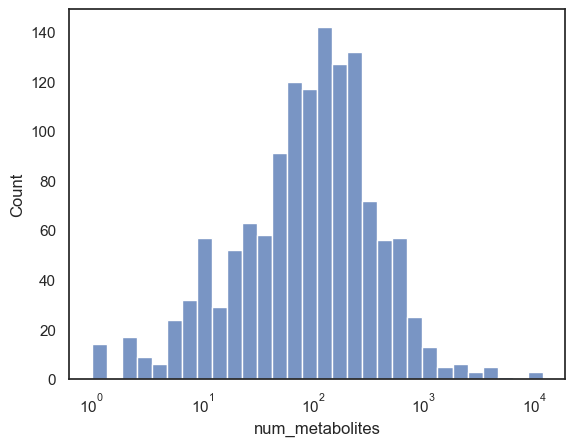

In [139]:
sns.histplot(
    data=studies_summary_human,
    x='num_metabolites',
    log_scale=True
)